# Did elimination of copayment increase visits to the physician?

In [1]:
import pandas as pd

/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv(r"femaleVisitsToPhysician-1.csv")

In [3]:
df['visits']=df.consultations
df.head()

,Unnamed: 0,year,age,sex,consultations,population,perCapita,visits
0,4,2006,1,f,67194.0,28221.0,2.380993,67194.0
1,7,2006,2,f,49802.0,28361.0,1.756003,49802.0
2,10,2006,3,f,42741.0,27899.0,1.531990,42741.0
3,13,2006,4,f,36555.0,28420.0,1.286242,36555.0
4,16,2006,5,f,33319.0,29479.0,1.130262,33319.0


In [4]:
%matplotlib inline

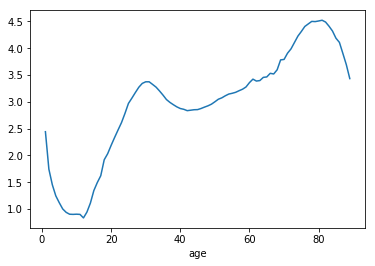

In [5]:
df.groupby('age')['perCapita'].mean().plot();

In [6]:
df14 = df.query('age==14')

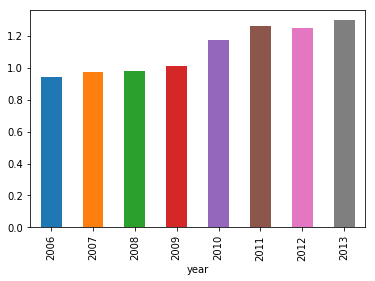

In [8]:
df14.set_index('year').perCapita.plot.bar();

In [9]:
df2 = df.query('age==14 or age==25')

In [10]:
want = ['year', 'age', 'perCapita']
df2 = df2[['year', 'age', 'perCapita']]

df2.head()

,year,age,perCapita
13,2006,14,0.941863
24,2006,25,2.724488
102,2007,14,0.970424
113,2007,25,2.883638
191,2008,14,0.976127


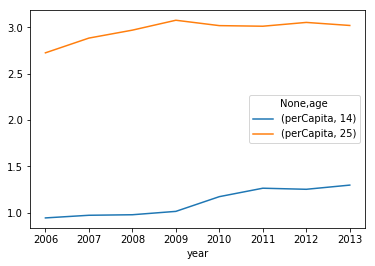

In [11]:
df2.set_index(['year', 'age']).unstack('age').plot();

In [12]:
df14and45 = df2.set_index(['year', 'age']).unstack('age')
df14and45

perCapita          
age         14        45
year                    
2006  0.941863  2.641180
2007  0.970424  2.743007
2008  0.976127  2.826450
2009  1.012518  2.790284
2010  1.171481  2.891743
2011  1.262579  2.997636
2012  1.250965  2.959752
2013  1.296148  2.987005

In [13]:
df14and45['copay'] = 0

In [14]:
df14and45['copay'] = df14and45.copay.where(df14and45.index<2010, 1)

In [15]:
df14and45

perCapita           copay
age         14        45      
year                          
2006  0.941863  2.641180     0
2007  0.970424  2.743007     0
2008  0.976127  2.826450     0
2009  1.012518  2.790284     0
2010  1.171481  2.891743     1
2011  1.262579  2.997636     1
2012  1.250965  2.959752     1
2013  1.296148  2.987005     1

In [29]:
df14and45.groupby('copay').mean()

perCapita          
age          14        45
copay                    
0      0.975233  2.750230
1      1.245293  2.959034

In [66]:
result = df14and45.groupby('copay').mean()
result

perCapita          
age          14        45
copay                    
0      0.975233  2.750230
1      1.245293  2.959034

In [34]:
result.columns = ['age_14', 'age_45']

In [35]:
result

,age_14,age_45
copay,,
0,0.975233,2.750230
1,1.245293,2.959034


In [38]:
result['age_45'] - result['age_14']

copay
0    1.774997
1    1.713741
dtype: float64

In [39]:
(result['age_45'] - result['age_14']).diff()

copay
0         NaN
1   -0.061257
dtype: float64

In [12]:
df2

,year,age,perCapita
13,2006,14,0.941863
24,2006,25,2.724488
102,2007,14,0.970424
113,2007,25,2.883638
191,2008,14,0.976127
202,2008,25,2.969386
280,2009,14,1.012518
291,2009,25,3.076277
369,2010,14,1.171481
380,2010,25,3.018165


In [13]:
# create new variable
df2['copay']=0
df2['copay']=df2['copay'].where(df2.year<2010,1)
df2

,year,age,perCapita,copay
13,2006,14,0.941863,0
24,2006,25,2.724488,0
102,2007,14,0.970424,0
113,2007,25,2.883638,0
191,2008,14,0.976127,0
202,2008,25,2.969386,0
280,2009,14,1.012518,0
291,2009,25,3.076277,0
369,2010,14,1.171481,1
380,2010,25,3.018165,1


In [14]:
import statsmodels.formula.api as smf

In [22]:
model = 'perCapita ~ copay + C(age) + C(age)*copay'


In [23]:
mod = smf.ols(formula=model, data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              perCapita   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     716.5
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           8.57e-14
Time:                        14:34:51   Log-Likelihood:                 19.871
No. Observations:                  16   AIC:                            -31.74
Df Residuals:                      12   BIC:                            -28.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.9752      0

C:\Users\hmelberg_adm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [56]:
import numpy as np

In [57]:
df2['age_14'] = np.where(df2.age==14,1,0)
df2

,year,age,perCapita,copay,age_14
13,2006,14,0.941863,0,1
44,2006,45,2.641180,0,0
102,2007,14,0.970424,0,1
133,2007,45,2.743007,0,0
191,2008,14,0.976127,0,1
222,2008,45,2.826450,0,0
280,2009,14,1.012518,0,1
311,2009,45,2.790284,0,0
369,2010,14,1.171481,1,1
400,2010,45,2.891743,1,0


# difference in difference model (example)

In [71]:
model = 'perCapita ~ age_14 + copay + copay * age_14'

In [72]:
mod = smf.ols(formula=model, data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              perCapita   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1339.
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           2.04e-15
Time:                        15:32:58   Log-Likelihood:                 25.841
No. Observations:                  16   AIC:                            -43.68
Df Residuals:                      12   BIC:                            -40.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7502      0.028     98.988   

C:\Users\hmelberg_adm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
